# Multi-Class Flower Classification 


Classes : 

0 : Daisy

1 : Dandelion

2 : Rose

3 : Sunflower

4 : Tulip



Github : http://github.com/ratheeshaditya

In [1]:
import os
# Ignore  the warnings
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random as rn
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

Using TensorFlow backend.


In [31]:
classes = {0:'daisy',
           1:'dandelion',
           2:'rose',
           3:'sunflower',
           4:'tulip'}
img_height = 200
img_width = 200
input_shape = (200,200,3)
epochs = 10

In [3]:
train_folder = 'flowers'

# Image Processing

In [90]:
training_data=[]
label = []
def process_image():
    for i in tqdm(range(len(classes))):
        print ('Working on directory {}'.format(classes[i]))
        for j in os.listdir(train_folder+'\\'+classes[i]):
                img_read = cv2.imread(os.path.join(train_folder+'\\'+classes[i]+'\\'+j), cv2.IMREAD_COLOR)
                img_read = cv2.resize(img_read,(img_height,img_width))
                
                training_data.append(np.array(img_read))
                label.append(str(classes[i]))

In [91]:
process_image()

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Working on directory daisy


 20%|████████████████▊                                                                   | 1/5 [00:01<00:06,  1.53s/it]

Working on directory dandelion


 40%|█████████████████████████████████▌                                                  | 2/5 [00:03<00:05,  1.72s/it]

Working on directory rose


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:05<00:03,  1.68s/it]

Working on directory sunflower


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:07<00:01,  1.70s/it]

Working on directory tulip


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.83s/it]


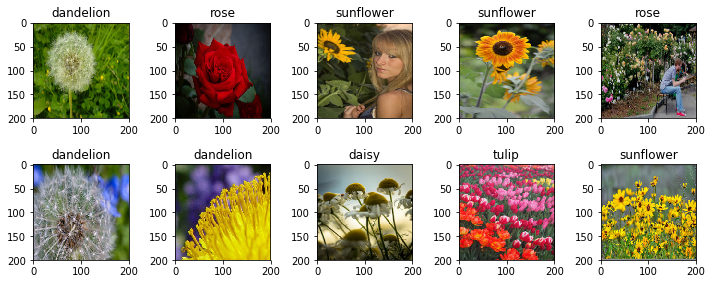

In [68]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    l=rn.randint(0,len(label)-1)
    plt.imshow(cv2.cvtColor(training_data[l], cv2.COLOR_BGR2RGB))
    plt.title(label[l])
    plt.tight_layout()
plt.show()
#plt.tight_layout()

In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
encoder = LabelEncoder()

In [94]:
Y = encoder.fit_transform(label)

In [95]:
Y = to_categorical(Y,len(classes)) #Labels

In [96]:
X = np.array(training_data)

In [97]:
X = X/255.0

In [98]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Model 

In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam , RMSprop
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization , GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint


model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',input_shape=(input_shape),activation ='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 512, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(len(classes), activation = "softmax"))

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
dropout_16 (Dropout)         (None, 200, 200, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100, 100, 128)     0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 50, 50, 256)       295168    
__________

In [26]:
learning_rate=0.00001

In [27]:
#Call backs
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    cooldown=1,
    min_lr=0.000001,
    verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=2 , verbose=1)


modelcheckpoint = ModelCheckpoint(filepath='weights/Flower-model-{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5',
                 monitor='val_loss', 
                 save_best_only=True,verbose=1)

#Optimizer
optimizer=Adam(lr=learning_rate)
callbacks =[reduce_lr,early_stopping,modelcheckpoint]

In [28]:
model.compile(optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=3,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [32]:
History = model.fit_generator(datagen.flow(x_train,y_train),
                              epochs = epochs, validation_data = (x_test,y_test),
                               steps_per_epoch=x_train.shape[0],callbacks=callbacks ,verbose=2)

Epoch 1/10
 - 1066s - loss: 0.9649 - acc: 0.6171 - val_loss: 1.0022 - val_acc: 0.6786

Epoch 00001: val_loss improved from inf to 1.00220, saving model to weights/Flower-model-01-val_acc-0.68-val_loss-1.00.hdf5
Epoch 2/10
 - 1074s - loss: 0.7483 - acc: 0.7138 - val_loss: 0.8879 - val_acc: 0.7295

Epoch 00002: val_loss improved from 1.00220 to 0.88785, saving model to weights/Flower-model-02-val_acc-0.73-val_loss-0.89.hdf5
Epoch 3/10
 - 1079s - loss: 0.6589 - acc: 0.7508 - val_loss: 0.8378 - val_acc: 0.7653

Epoch 00003: val_loss improved from 0.88785 to 0.83785, saving model to weights/Flower-model-03-val_acc-0.77-val_loss-0.84.hdf5
Epoch 4/10
 - 1075s - loss: 0.5899 - acc: 0.7794 - val_loss: 0.7872 - val_acc: 0.7653

Epoch 00004: val_loss improved from 0.83785 to 0.78715, saving model to weights/Flower-model-04-val_acc-0.77-val_loss-0.79.hdf5
Epoch 5/10
 - 1090s - loss: 0.5346 - acc: 0.8018 - val_loss: 0.7413 - val_acc: 0.7803

Epoch 00005: val_loss improved from 0.78715 to 0.74133, s

In [33]:
#Model history
accuracy = model.history.history['acc']
val_accuracy= model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

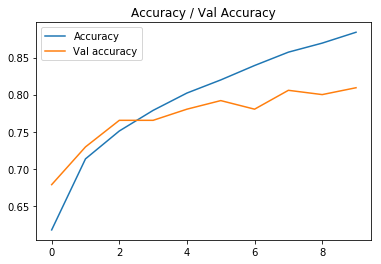

In [34]:
#Plot accuracy
plt.title('Accuracy / Val Accuracy')
plt.plot(accuracy , label='Accuracy')
plt.plot(val_accuracy,label='Val accuracy')
plt.legend()

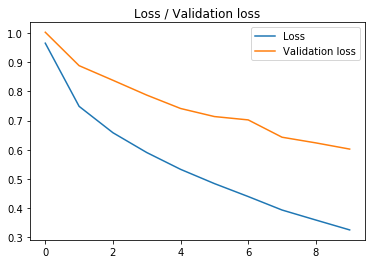

In [35]:
#Plot loss
plt.title('Loss / Validation loss')
plt.plot(loss,label='Loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()

# Predictions 

In [75]:
import tensorflow as tf

In [104]:
best_model = tf.keras.models.load_model('weights/Flower-model-10-val_acc-0.81-val_loss-0.60.hdf5') 
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
dropout_12 (Dropout)         (None, 200, 200, 64)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 100, 128)     0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 256)       295168    
__________

In [102]:
test_dir = 'test/'
def predict(path):
    predict_img = cv2.imread(path)
    predict_img = cv2.resize(predict_img,(200,200))
    label = best_model.predict(predict_img.reshape(-1,200,200,3))
    return classes[np.argmax(label)]
    

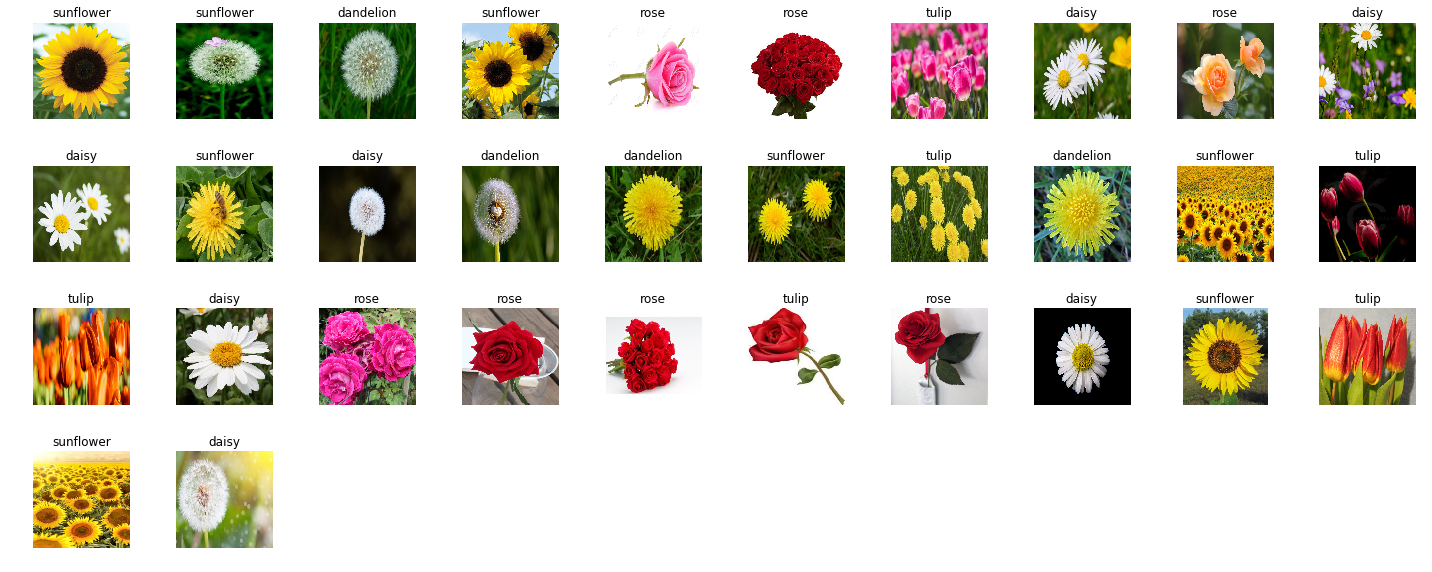

In [105]:
plt.figure(figsize=(20,20))
j=0
for i in os.listdir(test_dir):
    path = os.path.join(test_dir,i)
    label = predict(path)
    plt.subplot(10,10,j+1)
    plt.title(label)
    image = cv2.imread(path)
    image = cv2.resize(image,(200,200))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    j=j+1
    plt.tight_layout()
    plt.axis("off")
plt.show()

#Prediction on unlablled dataset